In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_excel("Flightprice.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Class,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,Economy Class,21:35,4h 45m,1 stop,No info,13302
1,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,Economy Class,11:25,2h 25m,non-stop,No info,3873
2,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,Economy Class,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
3,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,Economy Class,05:05 02 Mar,21h 5m,1 stop,No info,22270
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,Economy Class,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
...,...,...,...,...,...,...,...,...,...,...,...,...
1924,Air India,27/06/2019,Delhi,Cochin,DEL → HYD → MAA → COK,07:05,Economy Class,09:25 28 Jun,26h 20m,2 stops,No info,10975
1925,Multiple carriers,9/05/2019,Delhi,Cochin,DEL → BOM → COK,07:30,Economy Class,21:00,13h 30m,1 stop,No info,7670
1926,Multiple carriers,15/05/2019,Delhi,Cochin,DEL → BOM → COK,18:00,Economy Class,01:30 16 May,7h 30m,1 stop,No info,8073
1927,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:55,Economy Class,10:45 13 Mar,11h 50m,1 stop,No info,13817


In [3]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Class,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,Economy Class,21:35,4h 45m,1 stop,No info,13302
1,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,Economy Class,11:25,2h 25m,non-stop,No info,3873
2,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,Economy Class,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
3,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,Economy Class,05:05 02 Mar,21h 5m,1 stop,No info,22270
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,Economy Class,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087


In [4]:
df.shape

(1929, 12)

In [5]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Class', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1929 entries, 0 to 1928
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          1929 non-null   object
 1   Date_of_Journey  1929 non-null   object
 2   Source           1929 non-null   object
 3   Destination      1929 non-null   object
 4   Route            1929 non-null   object
 5   Dep_Time         1929 non-null   object
 6   Class            1929 non-null   object
 7   Arrival_Time     1929 non-null   object
 8   Duration         1929 non-null   object
 9   Total_Stops      1929 non-null   object
 10  Additional_Info  1929 non-null   object
 11  Price            1929 non-null   int64 
dtypes: int64(1), object(11)
memory usage: 181.0+ KB


In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Class              0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [3]:
df['Duration'] = df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)


In [4]:
df["Journey_day"] = df['Date_of_Journey'].str.split('/').str[0].astype(int)
df["Journey_month"] = df['Date_of_Journey'].str.split('/').str[1].astype(int)

In [5]:
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [7]:
df

,Airline,Source,Destination,Route,Dep_Time,Class,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,Economy Class,21:35,285,1 stop,No info,13302,1,3
1,SpiceJet,Kolkata,Banglore,CCU → BLR,09:00,Economy Class,11:25,145,non-stop,No info,3873,24,6
2,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,18:55,Economy Class,10:25 13 Mar,930,1 stop,In-flight meal not included,11087,12,3
3,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:00,Economy Class,05:05 02 Mar,1265,1 stop,No info,22270,1,3
4,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:55,Economy Class,10:25 13 Mar,1530,1 stop,In-flight meal not included,11087,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,Air India,Delhi,Cochin,DEL → HYD → MAA → COK,07:05,Economy Class,09:25 28 Jun,1580,2 stops,No info,10975,27,6
1925,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,07:30,Economy Class,21:00,810,1 stop,No info,7670,9,5
1926,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,18:00,Economy Class,01:30 16 May,450,1 stop,No info,8073,15,5
1927,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,22:55,Economy Class,10:45 13 Mar,710,1 stop,No info,13817,12,3


# EDA

In [24]:
df.describe()

,Duration,Price,Journey_day,Journey_month
count,1929.000000,1929.000000,1929.000000,1929.000000
mean,642.496112,9048.864178,13.697771,4.696216
std,512.116396,4414.598728,8.530115,1.170165
min,75.000000,1965.000000,1.000000,3.000000
25%,170.000000,5351.000000,6.000000,3.000000
50%,505.000000,8366.000000,12.000000,5.000000
75%,960.000000,12341.000000,21.000000,6.000000
max,2480.000000,46490.000000,27.000000,6.000000


In [12]:
df["Additional_Info"].value_counts()

No info                         1524
In-flight meal not included      350
No check-in baggage included      51
1 Long layover                     2
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [13]:
df["Airline"].unique()

array(['IndiGo', 'SpiceJet', 'Jet Airways', 'Multiple carriers',
       'Air India', 'GoAir', 'Air Asia', 'Vistara',
       'Multiple carriers Premium economy', 'Jet Airways Business',
       'Vistara Premium economy'], dtype=object)

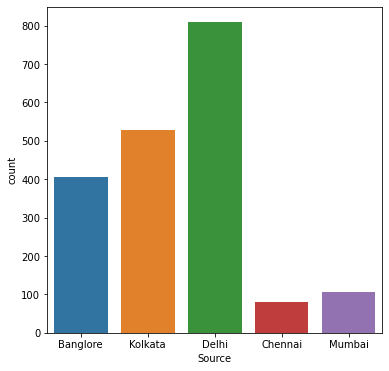

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(df['Source'])
plt.show()

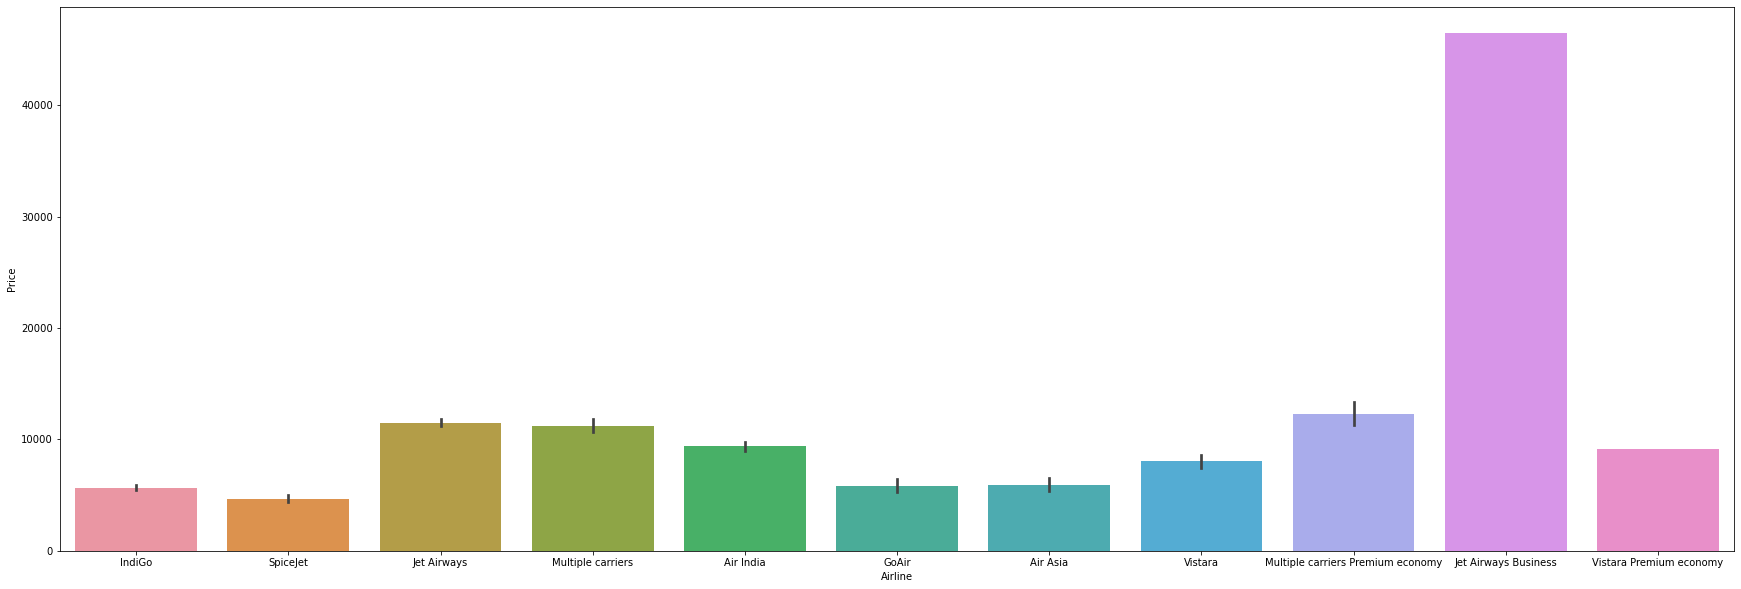

In [12]:
plt.figure(figsize=(30,10))
sns.barplot(x="Airline",y='Price', data=df)
plt.show()

Indigo is cheaper than Jet airways

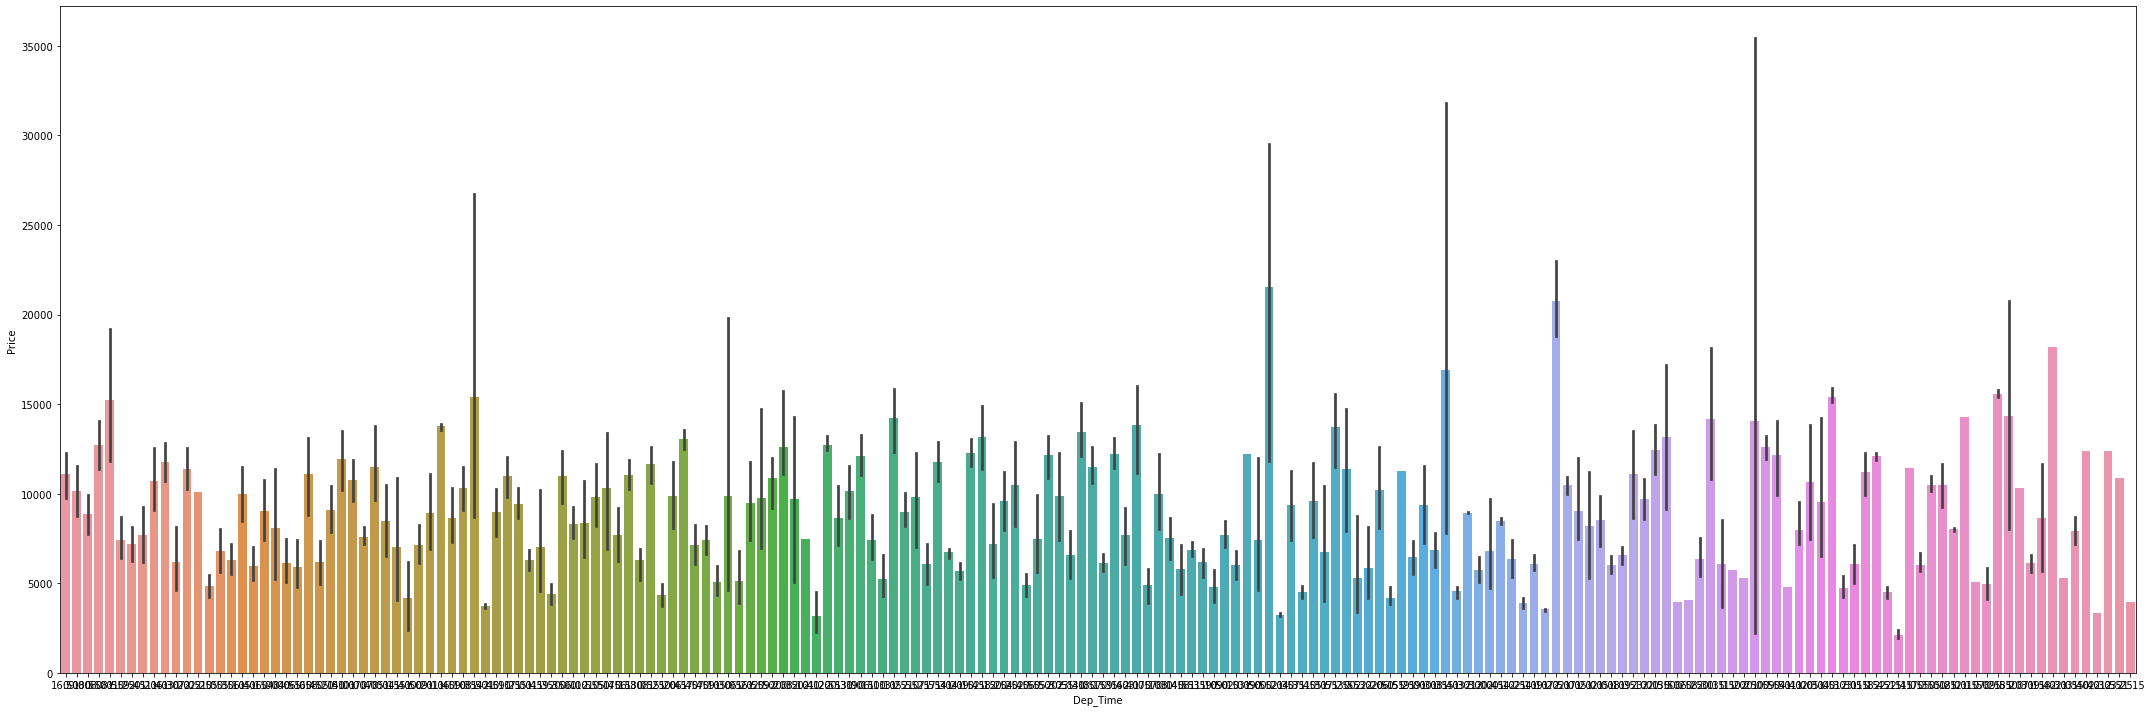

In [26]:
plt.figure(figsize=(30,10))
sns.barplot(x="Dep_Time",y='Price', data=df)
plt.show()

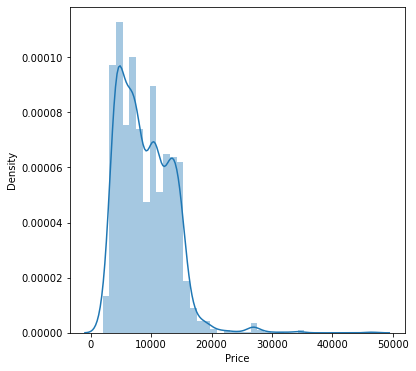

In [14]:
plt.figure(figsize=(6,6))
sns.distplot(df['Price'])
plt.show()

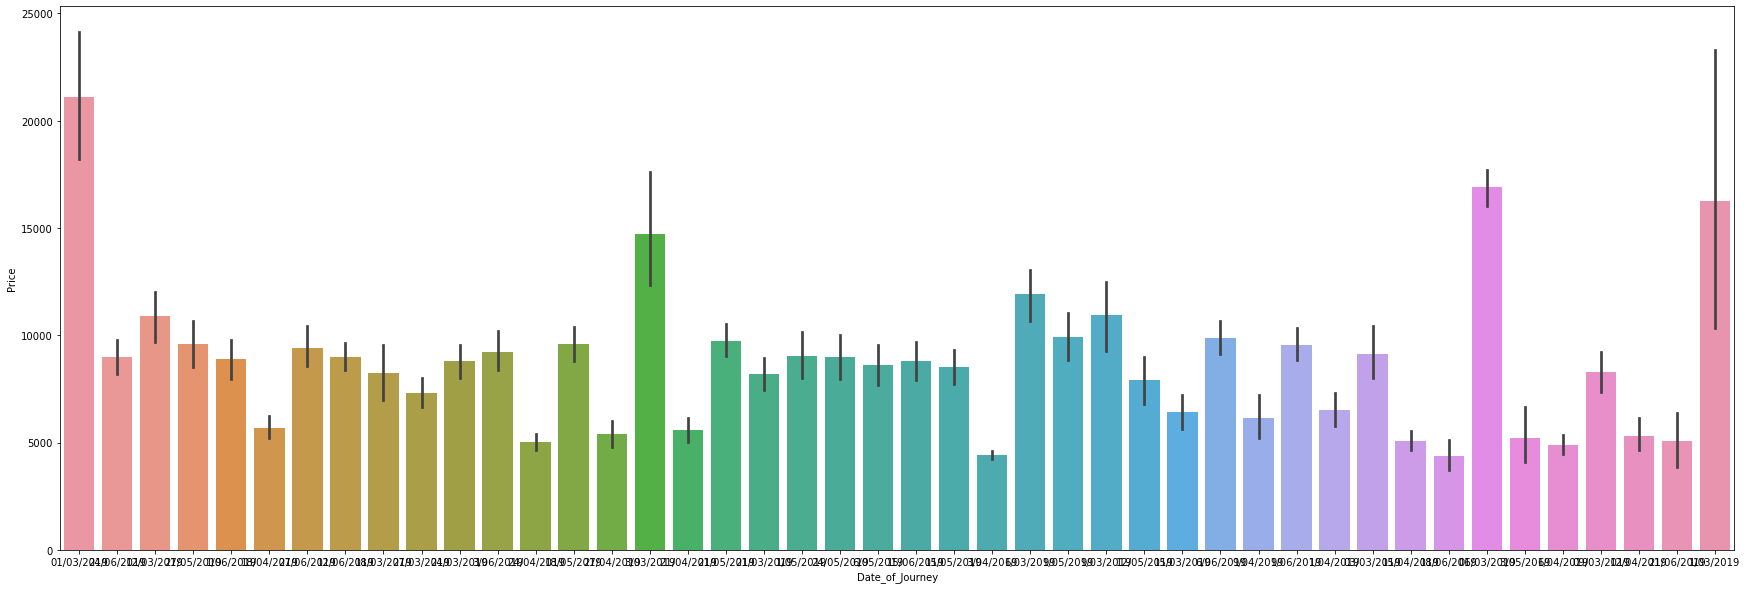

In [15]:
plt.figure(figsize=(30,10))
sns.barplot(x="Date_of_Journey",y='Price', data=df)
plt.show()

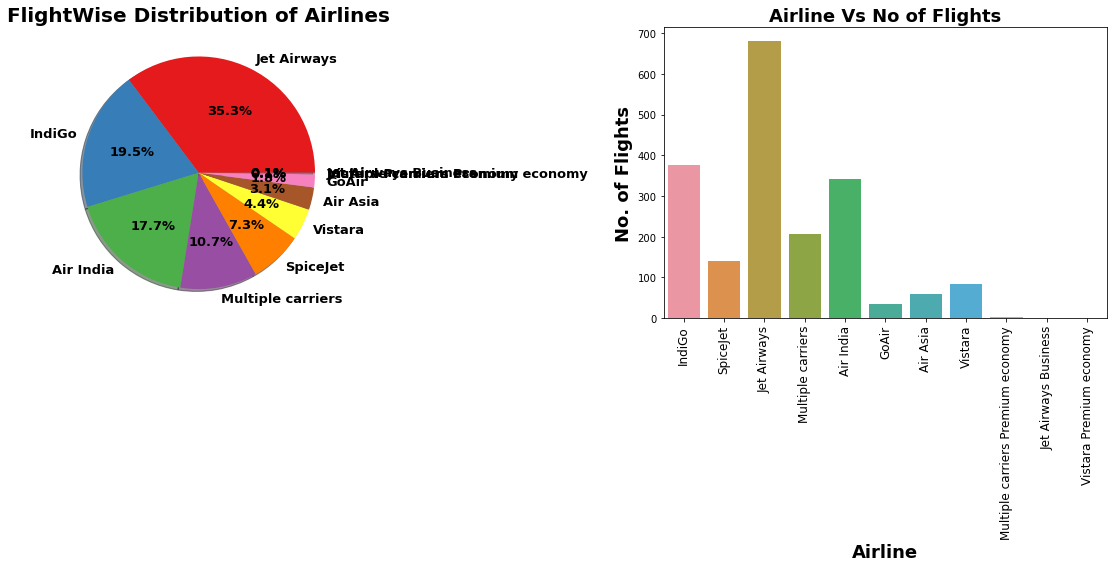

In [8]:
# Pie & count plot of Airline types
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Airline'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('FlightWise Distribution of Airlines', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Airline',data=df,ax=ax[1])
ax[1].set_title('Airline Vs No of Flights',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Airline",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Flights",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,rotation= 90)
plt.tight_layout()
plt.show()

We can see maximum number of flights run by Jet Airways

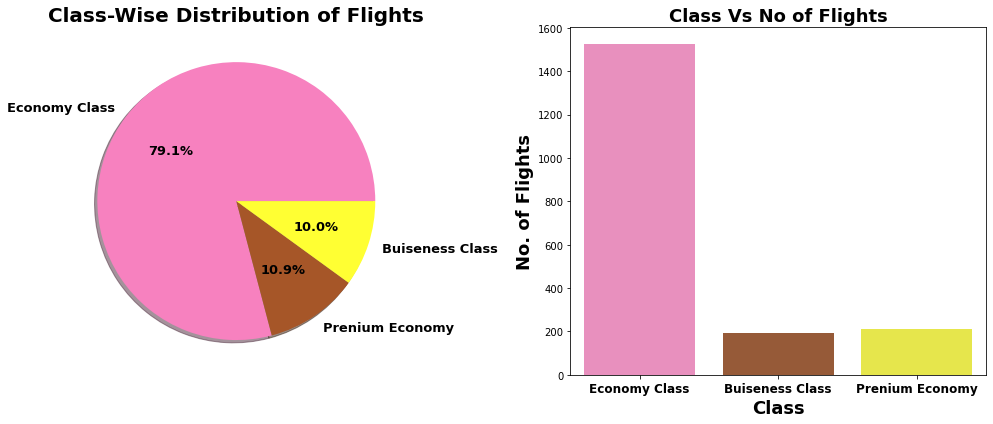

In [25]:
# Counting class type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1_r')
f,ax=plt.subplots(1,2,figsize=(14,6))
df['Class'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Class-Wise Distribution of Flights', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Class',data=df,ax=ax[1])
ax[1].set_title('Class Vs No of Flights',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Class",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Flights",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

79.1% flights are of Ecomony class, as they are low cost of flight & most of people prefer it.


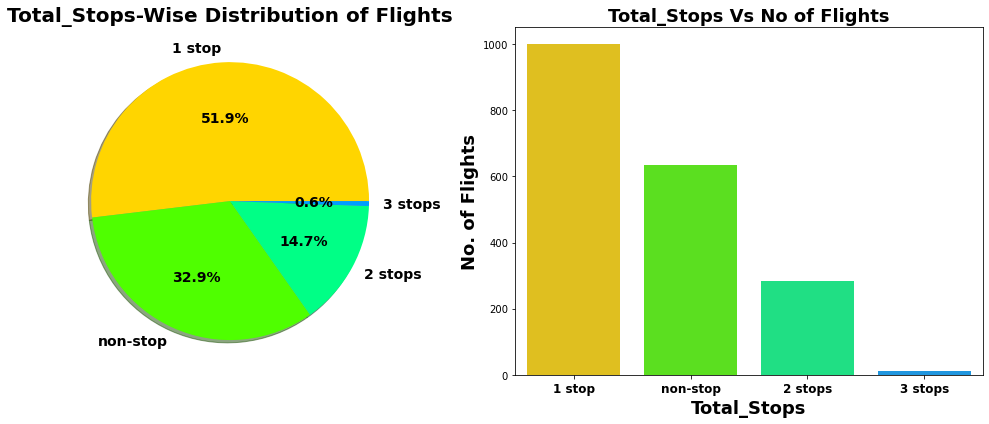

In [10]:
# Counting No of stops
plt.rcParams["figure.autolayout"] = True
sns.set_palette('hsv')
f,ax=plt.subplots(1,2,figsize=(14,6))
df['Total_Stops'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':14,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Total_Stops-Wise Distribution of Flights', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Total_Stops',data=df,ax=ax[1])
ax[1].set_title('Total_Stops Vs No of Flights',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Total_Stops",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Flights",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

51.9% flights take single stop in there way.It is also possible that these flights may have high flight duration compare to Non-stop Flight
32.9% of flights do not have any stop in there route.

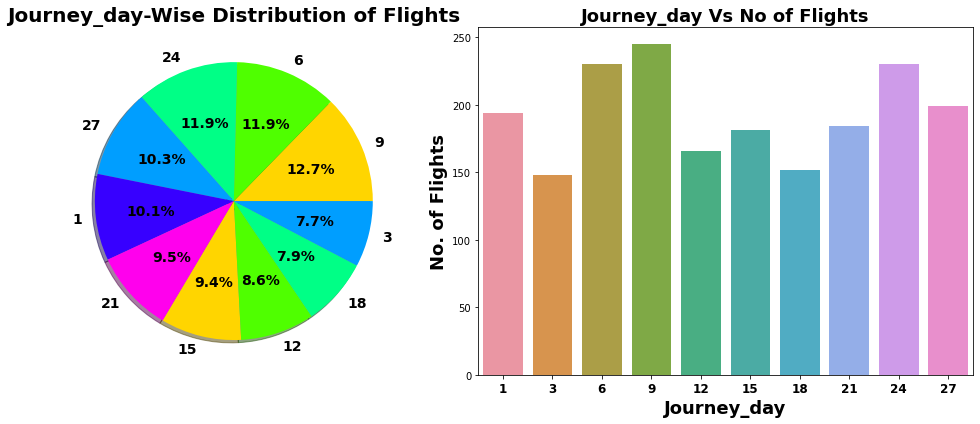

In [11]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('hsv')
f,ax=plt.subplots(1,2,figsize=(14,6))
df['Journey_day'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':14,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Journey_day-Wise Distribution of Flights', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Journey_day',data=df,ax=ax[1])
ax[1].set_title('Journey_day Vs No of Flights',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Journey_day",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Flights",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

On 9th  Maximum flights run while on 3rd of  minimum flights run

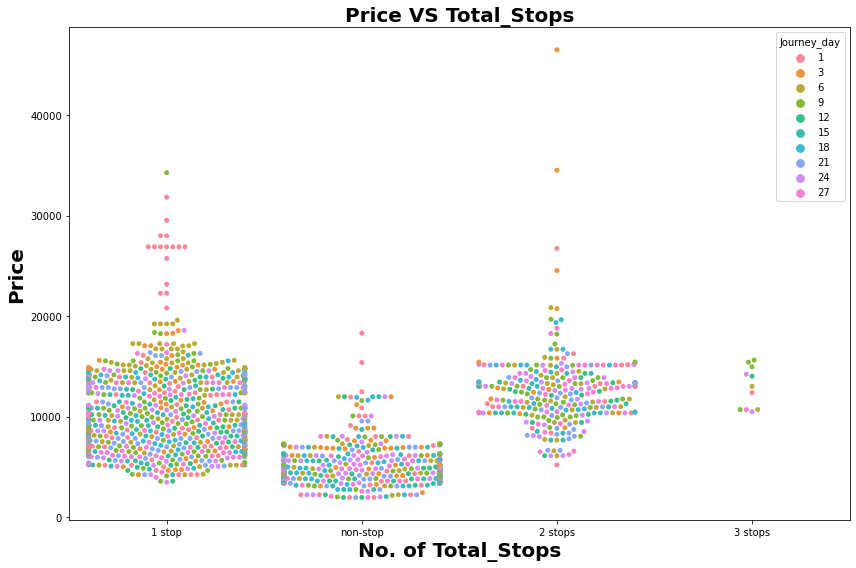

In [13]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('mako')
plt.figure(figsize =(12,8))
sns.swarmplot(y=df['Price'],x=df['Total_Stops'], hue= df['Journey_day'])
plt.title("Price VS Total_Stops",fontsize=20,fontweight ='bold')
plt.xlabel('No. of Total_Stops',fontsize = 20,fontweight ='bold')
plt.ylabel('Price',fontsize = 20,fontweight ='bold')
plt.tight_layout()
plt.show()

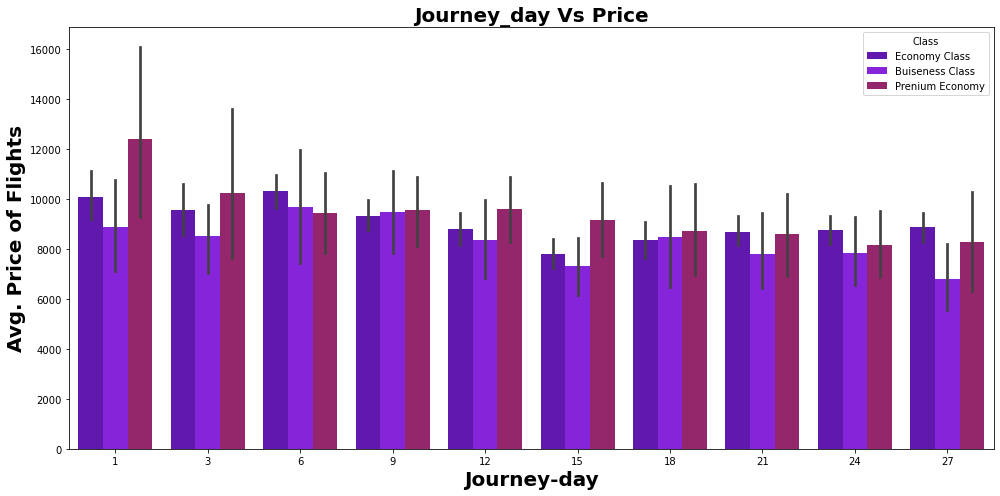

In [14]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot')
plt.figure(figsize =(14,7))
sns.barplot(x=df['Journey_day'],y=df['Price'],hue=df['Class'])
plt.title("Journey_day Vs Price",fontsize=20,fontweight ='bold')
plt.xlabel('Journey-day',fontsize = 20,fontweight ='bold')
plt.ylabel('Avg. Price of Flights',fontsize = 20,fontweight ='bold')
plt.tight_layout()
plt.show()

.Maximum Avg. Fare for Business Flights is on 6th and 9th  while minimum Avg. Fare for Business flights on 15th and 27th.
.For Premium Ecomony Flights: maximum Avg. Fare on 1st day of the month.
.Airfares changes frequently.
.For Economy class price move in small increments but for premium economy class sometimes it moves long jumps.
.Yes they turn to grow up and down over time.

# Feature Engineering

In [6]:
df.drop(columns=['Dep_Time','Arrival_Time','Source','Destination'], inplace= True)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [11]:
df

,Airline,Route,Class,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,3,14,1,285,0,4,13302,1,3
1,8,29,1,145,3,4,3873,24,6
2,4,3,1,930,0,2,11087,12,3
3,4,3,1,1265,0,4,22270,1,3
4,4,3,1,1530,0,2,11087,12,3
...,...,...,...,...,...,...,...,...,...
1924,1,70,1,1580,1,4,10975,27,6
1925,6,63,1,810,0,4,7670,9,5
1926,6,63,1,450,0,4,8073,15,5
1927,4,3,1,710,0,4,13817,12,3


We have sucessfully converted Categorical variable in numerical variable using label encoder

In [9]:
Categorical = ['Airline', 'Class', 'Aeroplane', 'Date', 'Stops', 'Day']
Numerical = ['Duration', 'Price']

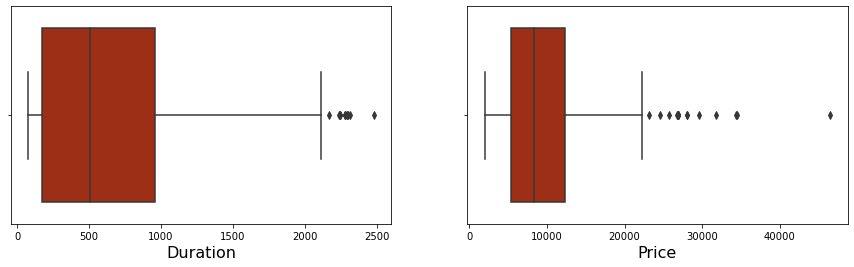

In [13]:
plt.figure(figsize=(15,4), facecolor ='white')
plt_num = 1
for i in Numerical:
    if plt_num <= 2:
        ax = plt.subplot(1,2,plt_num)
        sns.boxplot(df[i], palette='gnuplot')
        plt.xlabel(i, fontsize= 16)
    plt_num += 1
plt.show()

From Boxplot we can see presense of outliers.

Since Data is realstic and data is error-free, we will Proceed for building ML model without removing outliers. Since Outliers detected are with realstic value.

In [23]:
df.corr()

,Airline,Route,Class,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
Airline,1.000000,0.036572,-0.006238,-0.160324,0.009899,-0.109148,-0.003152,0.003267,0.001275
Route,0.036572,1.000000,-0.011296,0.274481,-0.394035,0.054473,0.197145,0.081695,0.263222
Class,-0.006238,-0.011296,1.000000,0.019005,-0.016361,-0.032161,0.054641,-0.031375,0.025371
Duration,-0.160324,0.274481,0.019005,1.000000,-0.562095,-0.159263,0.504834,0.030020,0.057083
Total_Stops,0.009899,-0.394035,-0.016361,-0.562095,1.000000,0.151390,-0.561174,0.026462,-0.067215
Additional_Info,-0.109148,0.054473,-0.032161,-0.159263,0.151390,1.000000,-0.032099,-0.035715,-0.046311
Price,-0.003152,0.197145,0.054641,0.504834,-0.561174,-0.032099,1.000000,-0.128091,-0.059573
Journey_day,0.003267,0.081695,-0.031375,0.030020,0.026462,-0.035715,-0.128091,1.000000,-0.067713
Journey_month,0.001275,0.263222,0.025371,0.057083,-0.067215,-0.046311,-0.059573,-0.067713,1.000000


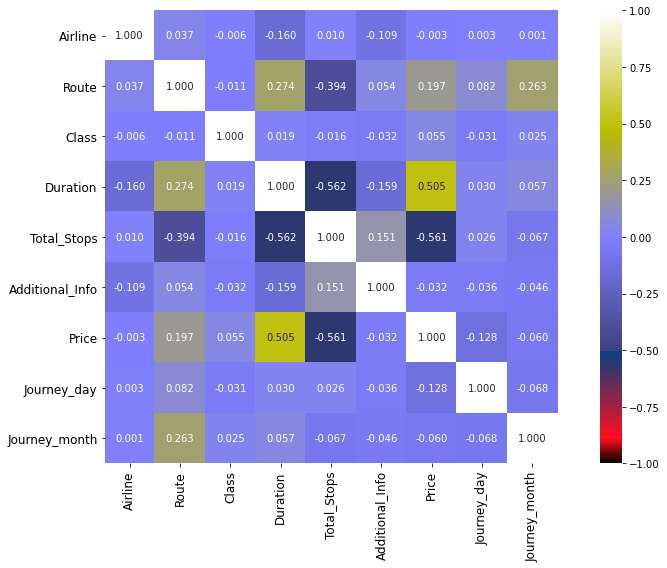

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),linecolor='black', vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap='gist_stern')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Model Building

In [10]:
# Splitting data in target and dependent feature
X = df.drop(['Price'], axis=1)
Y = df['Price']

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=0.33)
print('Training Feature Matrix Size:', X_train.shape)
print('Training Target Vector Size :', Y_train.shape)
print('Test Feature Matrix Size:', X_test.shape)
print('Test Target Vector Size:', Y_test.shape)

Training Feature Matrix Size: (1292, 8)
Training Target Vector Size : (1292,)
Test Feature Matrix Size: (637, 8)
Test Target Vector Size: (637,)


In [18]:
maxR2_score=0
maxRS=0
for i in range(50,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.49136371241878984 on Random_state 254


# Linear Regression

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 70, test_size=0.33)
lin_reg= LinearRegression()
lin_reg.fit(X_train, Y_train)
y_pred = lin_reg.predict(X_test)
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error :
Mean absolute error : 2451.080701791924
Mean squared error : 11073607.537171153
Root Mean squared error : 3327.703042215629
 R2 Score :
42.43059956594366


In [20]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.39798228086532506


# Random Forest Regressor

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 70, test_size=0.33)
rfc = RandomForestRegressor()
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)
print('\033[1m'+ 'Error of Random Forest Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Random Forest Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Random Forest Regressor:
Mean absolute error : 1076.3294248523584
Mean squared error : 3838002.3752777176
Root Mean squared error : 1959.0820236217057
R2 Score of Random Forest Regressor :
80.04701766181013


In [15]:
 from sklearn.model_selection import cross_val_score
score = cross_val_score(rfc, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',rfc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.7928782320354915


# Decision Tree Regressor

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 70, test_size=0.33)
dtc = DecisionTreeRegressor()
dtc.fit(X_train, Y_train)
y_pred = dtc.predict(X_test)
print('\033[1m'+ 'Error of Decision Tree Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Decision Tree Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Decision Tree Regressor:
Mean absolute error : 1288.2727629513345
Mean squared error : 6069723.780121664
Root Mean squared error : 2463.6809412181733
R2 Score of Decision Tree Regressor :
68.44475861646771


In [24]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dtc, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',dtc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.6850378651883936


# xgb Regressor

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 70, test_size=0.33)
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)
y_pred = xgb.predict(X_test)
print('\033[1m'+ 'Error of XGB Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of XGB Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of XGB Regressor:
Mean absolute error : 1051.6144724416208
Mean squared error : 3588511.6698362404
Root Mean squared error : 1894.3367361259297
R2 Score of XGB Regressor :
81.34406835445232


In [26]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',xgb,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) :

Mean CV Score : 0.8135555806243691


We can see that XGB Regressor gives maximum R2 score of 81.34 and maximum cross validation score. Among all model we will select XGB Regressor as final model and we will perform hyper parameter tuning over this model to enhance its R2 Score.

# Hyper Parameter Tuning 

In [27]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=70, test_size=0.33)
parameter = {'n_estimators':[400,500],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[6,8],
              'eta' : [0.01, 0.1] }

In [29]:
GCV = GridSearchCV(XGBRegressor(),parameter,verbose =10)
GCV.fit(X_train,Y_train)
print(GCV.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 1/5; 1/48] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400; total time=   1.1s
[CV 2/5; 1/48] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 2/5; 1/48] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400; total time=   1.1s
[CV 3/5; 1/48] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 3/5; 1/48] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400; total time=   1.1s
[CV 4/5; 1/48] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 4/5; 1/48] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400; total time=   1.1s
[CV 5/5; 1/48] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 5/5; 1/48] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_est

In [30]:
GCV.best_params_

{'booster': 'dart',
 'eta': 0.1,
 'gamma': 0.0,
 'max_depth': 6,
 'n_estimators': 400}

In [31]:
Final_mod=XGBRegressor(booster='gbtree', max_depth=6, eta=0.1,
                                gamma=0.1, n_estimators=400)
Final_mod.fit(X_train,Y_train)
pred=Final_mod.predict(X_test)
print('R2_Score:',r2_score(Y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(Y_test, pred)))

R2_Score: 81.87610309990966
mean_squared_error: 3486173.5540505466
mean_absolute_error: 1037.6733724213843
RMSE value: 1867.1297635811354


In [32]:
import pickle
filename='flightprice.pkl'
pickle.dump(Final_mod,open(filename,'wb'))